## Quantum Fourier Dönüşümü

In [1]:
import cirq
import numpy as np
from matplotlib import pyplot

In [2]:
# Bir QFT Devresi oluşturur.
def make_qft(qubits):
    qreg = list(qubits)
    while len(qreg) > 0:
        q_head = qreg.pop(0)
        yield cirq.H(q_head)
        for i, qubit in enumerate(qreg):
            yield (cirq.CZ ** (1 / 2 ** (i + 1)))(qubit, q_head)

In [3]:
qubits = cirq.LineQubit.range(4)
qft = cirq.Circuit(make_qft(qubits))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@───────────────────────────────────────
          │        │           │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────
                   │           │      │         │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────────
                               │                │          │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───
                  └───────┘   └────────────┘   └───────┘


In [4]:
qft_operation = cirq.qft(*qubits, without_reverse=True)
qft_cirq = cirq.Circuit(qft_operation)
print(qft_cirq)

0: ───qft[norev]───
      │
1: ───#2───────────
      │
2: ───#3───────────
      │
3: ───#4───────────


In [5]:
# 5 = bin(101). Bu nedenle 0. ve 2. kubitlere X uygulanir.
qft.append(cirq.X(qubits[0]))
qft.append(cirq.X(qubits[2]))
qft.append(cirq.measure(*qubits, key="M"))
print(qft)

                  ┌───────┐   ┌────────────┐   ┌───────┐
0: ───H───@────────@───────────@────────────────X──────────────────────M('M')───
          │        │           │                                       │
1: ───────@^0.5────┼─────H─────┼──────@─────────@──────────────────────M────────
                   │           │      │         │                      │
2: ────────────────@^0.25──────┼──────@^0.5─────┼─────H────@───────X───M────────
                               │                │          │           │
3: ────────────────────────────@^(1/8)──────────@^0.25─────@^0.5───H───M────────
                  └───────┘   └────────────┘   └───────┘


In [6]:
sim = cirq.Simulator()
results = sim.run(qft, repetitions=1024)

{'0010': 67, '1101': 68, '1100': 76, '1110': 67, '1000': 57, '0110': 62, '0000': 61, '0111': 56, '1011': 61, '0011': 61, '1001': 55, '1111': 62, '0100': 60, '0101': 61, '0001': 71, '1010': 79}


Text(0, 0.5, 'Adet')

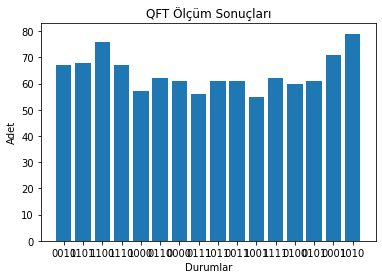

In [9]:
hist = dict()
for val in results.measurements["M"]:
    new_str = ""
    for s in val:
        new_str += str(s)
    try:
        hist[new_str] += 1
    except KeyError:
        hist[new_str] = 1
        
print(hist)
pyplot.bar(hist.keys(), hist.values())
pyplot.title("QFT Ölçüm Sonuçları")
pyplot.xlabel("Durumlar")
pyplot.ylabel("Adet")